<h3 align="center">Codebasics ML Course: Gradient Boosting Regression Tutorial</h3>

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

### Load Data

In [2]:
df = pd.read_csv("ad_spend.csv")
df.head(3)

,Ad Spend ($),Season,Revenue ($)
0,463.452554,Monsoon,440.671281
1,158.403022,Winter,297.594197
2,328.523873,Monsoon,214.694285


### Exploratory Data Analysis: EDA

In [3]:
df.shape

(200, 3)

In [71]:
g = df.groupby("Season")[['Revenue ($)', 'Ad Spend ($)']].mean()
g

,Revenue ($),Ad Spend ($)
Season,,
Monsoon,423.691430,518.120808
Summer,689.837327,574.412294
Winter,827.018838,553.117307


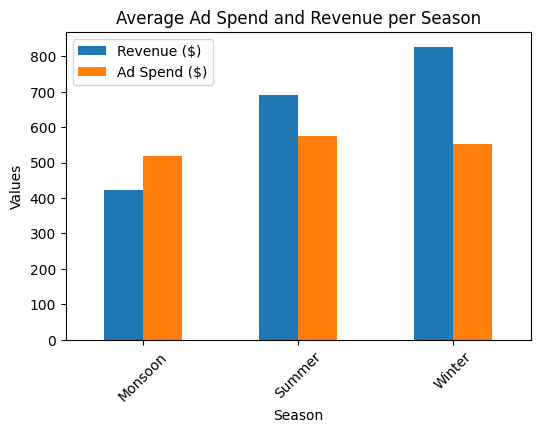

In [72]:
ax = g.plot(kind='bar', figsize=(6, 4))
ax.set_title('Average Ad Spend and Revenue per Season')
ax.set_xlabel('Season')
ax.set_ylabel('Values')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

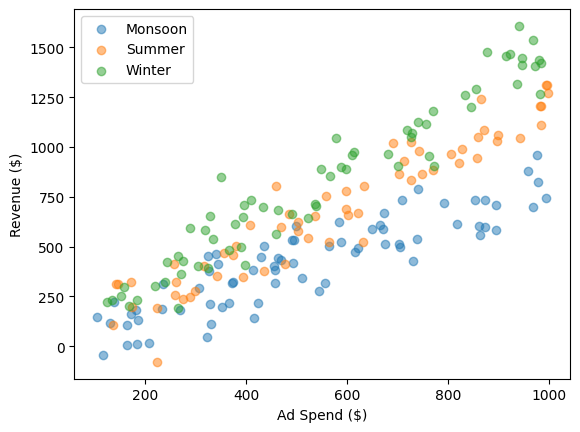

In [62]:
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"], subdf["Revenue ($)"], label=season, alpha=0.5)

plt.xlabel("Ad Spend ($)")    
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

### Feature Engineering: Encode the Categorical Data Using One Hot Encoding

In [14]:
df_encoded = pd.get_dummies(df, columns=['Season'], drop_first=True)
df_encoded

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463.452554,440.671281,False,False
1,158.403022,297.594197,False,True
2,328.523873,214.694285,False,False
3,322.188457,48.371365,False,False
4,726.673846,1048.006022,False,True
...,...,...,...,...
195,407.691700,609.821561,True,False
196,182.619159,183.654134,False,False
197,184.741289,10.634094,False,False
198,380.271978,504.835785,True,False


### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

X = df_encoded[["Ad Spend ($)", "Season_Summer", "Season_Winter"]]
y = df_encoded["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

### Train a Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8880598565939465

### Train a Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8945941313328813

### Train a Gradient Boosting Model

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9142080992699719

The score of Linear Regression, Decision Tree and Gradient Boosting Model is almost the same.

In [19]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

19752.72000032178

In [21]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval.head(3)

,Actual,Predicted
119,1052.699878,978.765776
77,-42.664287,119.521553
148,708.359288,572.016505


In [50]:
df_eval['Diff %'] = abs((df_eval['Predicted'] - df_eval['Actual'])*100/df_eval['Actual'])
df_eval

,Actual,Predicted,Diff %
119,1052.699878,978.765776,7.023284
77,-42.664287,119.521553,380.144266
148,708.359288,572.016505,19.247688
149,321.805120,348.945861,8.433906
154,234.380649,232.508778,0.798646
151,1293.546235,1234.832273,4.538992
122,246.909294,397.177783,60.859794
6,186.803951,211.009151,12.957542
28,311.537767,211.009151,32.268516
71,467.092942,501.583530,7.384095


In [51]:
df_eval['Diff %'].quantile(0.75)

32.95167000572167